In [81]:
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd

In [82]:
Rank=[]
Name=[]
Rate=[]
Reviews=[]
Phone =[]
Address=[]
District=[]

number = 0
while number < 91:
    url = 'https://www.yelp.com/search?find_desc=ice%20cream%20shops&find_loc=10023&start='+str(number)
    ourUrl=urllib.request.urlopen(url)
    soup=BeautifulSoup(ourUrl,'html.parser')
    
    for i in soup.find_all('div',class_="lemon--div__373c0__1mboc largerScrollablePhotos__373c0__3FEIJ arrange__373c0__UHqhV border-color--default__373c0__2oFDT"):  
        #extract ranking
        pre_rank = i.find('p',class_='lemon--p__373c0__3Qnnj text__373c0__2pB8f text-color--black-regular__373c0__38bRH text-align--left__373c0__2pnx_ text-size--inherit__373c0__2gFQ3').text
        pre_rank=str(pre_rank).split(".",1) #split rank and name
        rank=pre_rank[0]

        if rank.isnumeric():
            #extract name
            name=i.find('a').text.encode('utf-8')


            #extract rate
            rate = str(i.find('span',class_='lemon--span__373c0__3997G display--inline__373c0__1DbOG border-color--default__373c0__2oFDT'))
            if rate[107:110] == 'div':
                pre_rate = i.find('span',class_='lemon--span__373c0__3997G display--inline__373c0__1DbOG border-color--default__373c0__2oFDT').find('div')
                pre_rate=str(pre_rate)
                rate= pre_rate[17:20]
                rate= rate.replace('s','')
            else:
                rate='No rating information'

            #extract Number of reviews
            if rate =='No rating information':
                reviews = 'No Information'
            else:
                reviews = i.find('span',class_='lemon--span__373c0__3997G text__373c0__2pB8f reviewCount__373c0__2r4xT text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_').text

            #extract phone number, Address, and District
            ContactInfo = i.find_all('p',class_='lemon--p__373c0__3Qnnj text__373c0__2pB8f text-color--normal__373c0__K_MKN text-align--right__373c0__3ARv7')
            list=[]
            for k in ContactInfo:
                list.append(k.text)

            if len(list)==3:    #In case of missing value among three attributes
                phone=list[0]
                address = list[1]
                district = list[2]
            else:
                if len(list[0])==14:
                    phone = list[0]
                    address = list[1]
                    district = 'No Information'
                else:
                    phone = 'No information'
                    address = list[0]
                    district = list[1]
            

            print(rank)
            print(name.decode('utf-8'))
            print(rate)
            print(reviews)
            print(phone)
            print(address)
            print(district)
            Rank.append(rank)
            Name.append(name.decode('utf-8'))  # append name
            Rate.append(rate)
            Reviews.append(reviews)
            Phone.append(phone)
            Address.append(address)
            District.append(district)
            
    number += 10
    

1
Emack and Bolio’s
4 
286 reviews
(212) 362-2747
389 Amsterdam Ave
Upper West Side
2
Van Leeuwen Artisan Ice Cream
4.5
12 reviews
(917) 388-2904
1250 6th Ave
Theater District
3
CoolMess
4 
154 reviews
(212) 355-9834
137 E 62nd St
Upper East Side
4
Mochidoki
3.5
23 reviews
(212) 684-0991
1000 S 8th Ave
Upper West Side
5
Van Leeuwen Ice Cream Truck
3.5
118 reviews
(718) 701-1630
Upper West Side
No Information
6
A La Mode Shoppe
4.5
86 reviews
(917) 639-3401
360 E 55th St
Midtown East
7
Heavenly Delights
4 
5 reviews
(212) 759-9324
767 Lexington Ave
Upper East Side
8
Van Leeuwen Ice Cream
4.5
23 reviews
(646) 368-9195
253 Columbus Ave
Upper West Side
9
Ample Hills Creamery
4.5
348 reviews
(212) 582-9354
600 11th Ave
Hell's Kitchen
10
Forty Carrots
4 
5 reviews
No information
2085 Broadway
Upper West Side
11
Heavenly Delights
4 
5 reviews
(212) 759-9324
767 Lexington Ave
Upper East Side
12
Van Leeuwen Ice Cream
4.5
23 reviews
(646) 368-9195
253 Columbus Ave
Upper West Side
13
The Sweet Sh

In [44]:
dataframe = pd.DataFrame({'Rank':Rank,'Name':Name,'Rate':Rate,'Reviews Number':Reviews,'Phone Number':Phone, 'Address':Address,'District':District})
dataframe.to_csv("icecreamshop.csv",index=False,sep=',')

In [45]:
df = pd.read_csv("icecreamshop.csv", encoding='utf-8')

In [46]:
df

,Rank,Name,Rate,Reviews Number,Phone Number,Address,District
0,1,UES.,3,301 reviews,(646) 559-5889,1707 2nd Ave,Yorkville
1,2,Emack and Bolio’s,4,286 reviews,(212) 362-2747,389 Amsterdam Ave,Upper West Side
2,3,Van Leeuwen,4.5,32 reviews,(646) 719-1998,432 3rd Ave,Kips Bay
3,4,Van Leeuwen Artisan Ice Cream,4.5,12 reviews,(917) 388-2904,1250 6th Ave,Theater District
4,5,CoolMess,4,154 reviews,(212) 355-9834,137 E 62nd St,Upper East Side
5,6,Mochidoki,3.5,23 reviews,(212) 684-0991,1000 S 8th Ave,Upper West Side
6,7,Kaylee’s Creamery,4.5,216 reviews,(332) 201-1303,115 E 27th St,Flatiron
7,8,Van Leeuwen Ice Cream Truck,3.5,118 reviews,(718) 701-1630,Upper West Side,No Information
8,9,A La Mode Shoppe,4.5,86 reviews,(917) 639-3401,360 E 55th St,Midtown East
9,10,Heavenly Delights,4,5 reviews,(212) 759-9324,767 Lexington Ave,Upper East Side


In [121]:

number_of_shop=df.District.value_counts()   
xticks = []
yticks = []
for i in number_of_shop.keys():
    xticks.append(i)
    value=number_of_shop[i]
    yticks.append(value)

print(xticks,yticks)

['Upper West Side', 'Midtown West', 'Upper East Side', 'Midtown East', "Hell's Kitchen", 'Theater District', 'No Information', 'Yorkville', 'Flatiron', 'Murray Hill', 'Kips Bay'] [20, 18, 13, 10, 10, 7, 2, 1, 1, 1, 1]


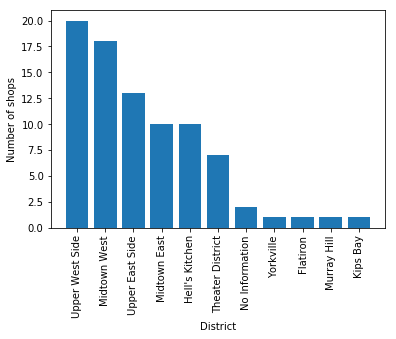

In [100]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.bar(xticks, yticks,0.8, align='center')
plt.xticks(rotation=90)
plt.xlabel('District')
plt.ylabel('Number of shops')

plt.show()

In [150]:
max = len(df)
Avg = []
for item in xticks:
    count = 0
    total = 0
    for i in range(0,max):
        if df['District'][i] == item:
            if df['Rate'][i][0].isnumeric():
                count+=1
                total = total + float(df['Rate'][i])
    if count == 0: # in case of division by zero
        count = 1
    avg = total/count
    Avg.append(round(avg,2))
print(Avg)

[3.53, 3.74, 3.77, 3.6, 3.94, 3.79, 3.75, 3.0, 4.5, 3.5, 4.5]


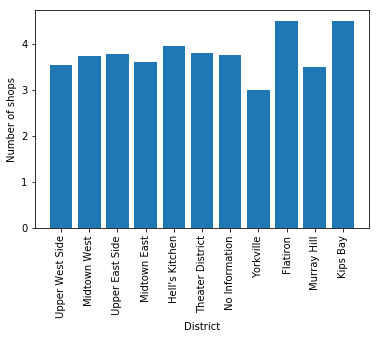

In [151]:
plt.bar(xticks, Avg,0.8, align='center')
plt.xticks(rotation=90)
plt.xlabel('District')
plt.ylabel('Number of shops')

plt.show()